<details>
<summary> Task Instruction </summary>

```
Here is the background information on your task
The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
Historical pricing data: variable and fixed pricing data etc
Churn indicator: whether each customer has churned or not

Please submit analysis in a code script, notebook, or PDF format. 

Please note, there are multiple ways to approach the task and that the sample answer is just one way to do it.


Here is your task
Sub-Task 1:

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

Sub-Task 2:

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.


Sub-Task 3:

Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.

For your final deliverable, please submit your analysis (in the form of a jupyter notebook, code script or PDF) as well as your half-page summary document.

Note: Use the 2 datasets within the additional resources for this task and if you’re unsure on where to start with visualizing data, use the accompanying links. Be sure to also use the data description document to understand what the columns represent. The task description document outlines the higher-level motivation of the project. Finally, use the eda_starter.ipynb file to get started with some helper functions and methods.
```
</details>


# Exploratory Data Analysis

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [4]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


<details>
<summary> Data Description </summary>

```
client_data.csv

●	id = client company identifier
●	activity_new = category of the company’s activity
●	channel_sales = code of the sales channel
●	cons_12m = electricity consumption of the past 12 months
●	cons_gas_12m = gas consumption of the past 12 months
●	cons_last_month = electricity consumption of the last month
●	date_activ = date of activation of the contract
●	date_end = registered date of the end of the contract
●	date_modif_prod = date of the last modification of the product
●	date_renewal = date of the next contract renewal
●	forecast_cons_12m = forecasted electricity consumption for next 12 months
●	forecast_cons_year = forecasted electricity consumption for the next calendar year
●	forecast_discount_energy = forecasted value of current discount
●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
●	has_gas = indicated if client is also a gas client
●	imp_cons = current paid consumption
●	margin_gross_pow_ele = gross margin on power subscription
●	margin_net_pow_ele = net margin on power subscription
●	nb_prod_act = number of active products and services
●	net_margin = total net margin
●	num_years_antig = antiquity of the client (in number of years)
●	origin_up = code of the electricity campaign the customer first subscribed to
●	pow_max = subscribed power
●	churn = has the client churned over the next 3 months

price_data.csv

●	id = client company identifier
●	price_date = reference date
●	price_off_peak_var = price of energy for the 1st period (off peak)
●	price_peak_var = price of energy for the 2nd period (peak)
●	price_mid_peak_var = price of energy for the 3rd period (mid peak)
●	price_off_peak_fix = price of power for the 1st period (off peak)
●	price_peak_fix = price of power for the 2nd period (peak)
●	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power

```
</details>

---

## Descriptive statistics of data

### Data types


In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Unique customers

In [8]:
client_df[['id']].value_counts()

id                              
0002203ffbb812588b632b9e628cc38d    1
ab250252dfaded1c9a54834f9c829b43    1
ab32c3a8d93c88b485499566526cb34d    1
ab3392ec2bfd3605624f31d3c6828c21    1
ab346731fef5aa291919ea43e45af5a7    1
                                   ..
55091aace7bd0fadd194f46cb4886fea    1
550b8d2f9c298abd8f05fca3bc1a13c4    1
5514b18508f378a39f41657554aa72e3    1
551cb1b1faf72259c2c182dedec12c98    1
ffff7fa066f1fb305ae285bb03bf325a    1
Length: 14606, dtype: int64

In [9]:
price_df[['id']].value_counts()

id                              
0002203ffbb812588b632b9e628cc38d    12
ab07311332ad017c071947aa1747bf9e    12
aab99b3be145225dbff8551b256da9e0    12
aac9a198cee4c2eb9d975ca21b38f00b    12
aacb5f6ab9d32c8cc9e58c505b028d24    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
223a98d3832ece78cbf279a194868b54     8
bf89f2d8c1b133a134fd93603cb4c947     7
c5dcd5c506e565aaabffa29bc1ec0a37     7
15b36e47cf04bf151e3f4438d12672e5     7
Length: 16096, dtype: int64

In [10]:
# how many clients are in both datasets?
price_df.merge(client_df, on='id')['id'].nunique()

14606

### Statistics

Now let's look at some statistics about the datasets. 

In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization


Text(0.5, 1.0, 'Percentage of Churned Clients')

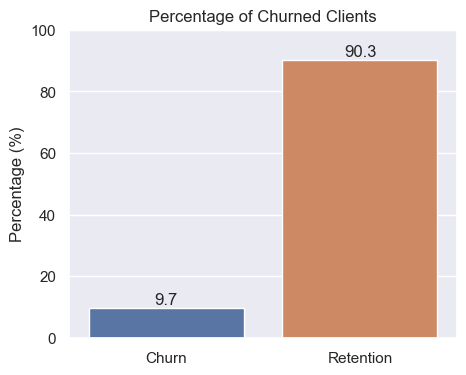

In [13]:
# visualize the proportion of churned clients
churn_prop = client_df['churn'].sum()/client_df.shape[0] 

plt.figure(figsize=(5, 4))
ax = sns.barplot(x=['Churn', 'Retention'], y=[churn_prop * 100, 100 -churn_prop * 100])
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.title('Percentage of Churned Clients')

#### Sale channels

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'foosdfpfkusacimwkcsosbicdxkicaua'),
  Text(1, 0, 'MISSING'),
  Text(2, 0, 'lmkebamcaaclubfxadlmueccxoimlema'),
  Text(3, 0, 'usilxuppasemubllopkaafesmlibmsdf'),
  Text(4, 0, 'ewpakwlliwisiwduibdlfmalxowmwpci'),
  Text(5, 0, 'epumfxlbckeskwekxbiuasklxalciiuu'),
  Text(6, 0, 'sddiedcslfslkckwlfkdpoeeailfpeds'),
  Text(7, 0, 'fixdbufsefwooaasfcxdxadsiekoceaa')])

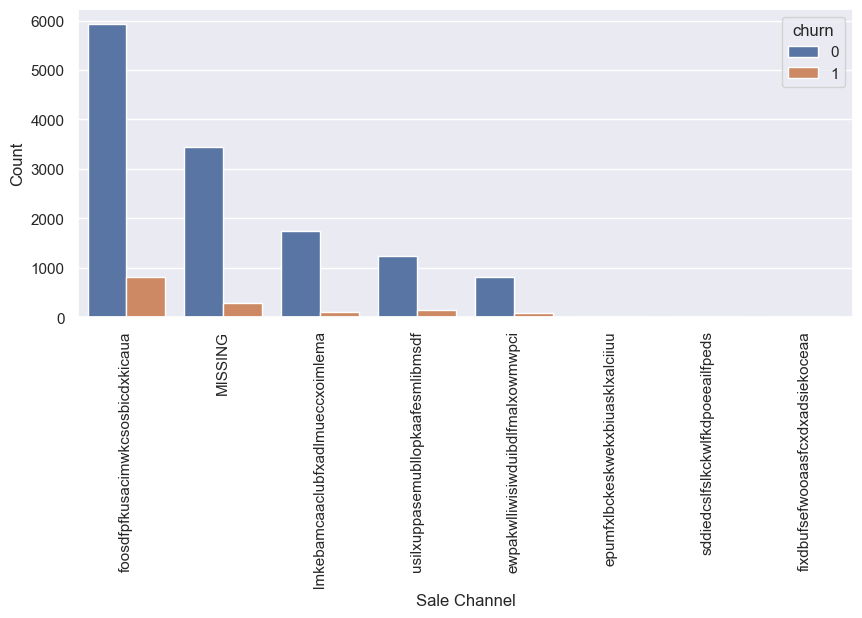

In [14]:
# distribution of sale channel
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='channel_sales', data=client_df, hue='churn')
ax.set(xlabel='Sale Channel', ylabel='Count')
plt.xticks(rotation=90)

#### Consumptions

Text(0.5, 1.02, 'Distribution of Electricity Consumption in the Past 12 Months')

<Figure size 800x600 with 0 Axes>

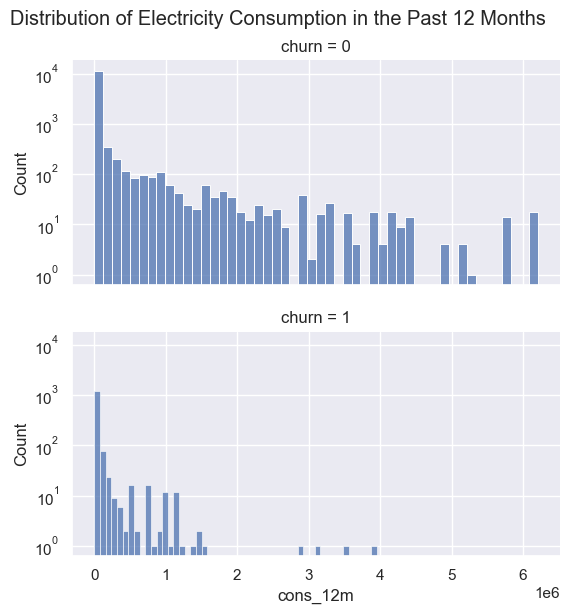

In [15]:
# distribution of electricity consumption in the past 12 months
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(client_df, row='churn', height=3, aspect=2)
g.map(sns.histplot, 'cons_12m', bins=50)
# use log for better visualization on y-axis    
g.set(yscale='log')
plt.suptitle('Distribution of Electricity Consumption in the Past 12 Months', y=1.02)

Text(0.5, 1.02, 'Distribution of Gas Consumption in the Past 12 Months')

<Figure size 800x600 with 0 Axes>

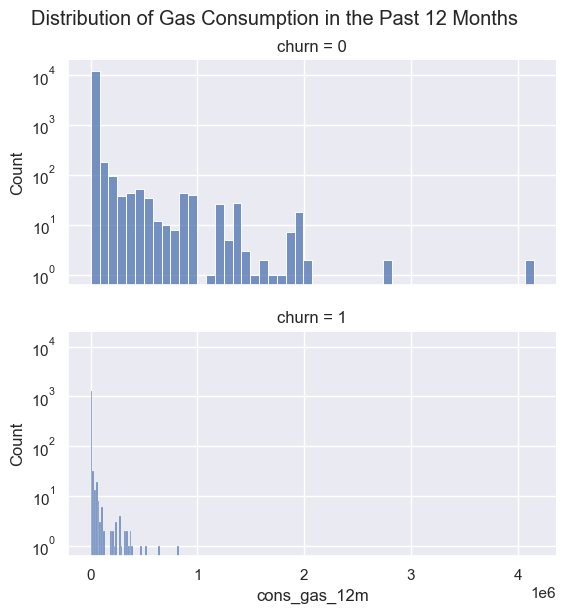

In [16]:
# distribution of gas consumption in the past 12 months
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(client_df, row='churn', height=3, aspect=2)
g.map(sns.histplot, 'cons_gas_12m', bins=50)
# use log for better visualization on y-axis    
g.set(yscale='log')
plt.suptitle('Distribution of Gas Consumption in the Past 12 Months', y=1.02)

Text(0.5, 1.02, 'Distribution of Electricity Consumption in the Last Month')

<Figure size 800x600 with 0 Axes>

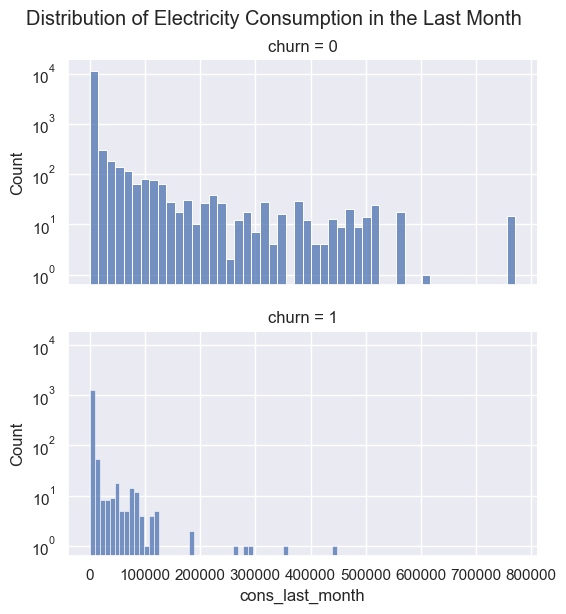

In [17]:
# distribution of electricity consumption in the past month
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(client_df, row='churn', height=3, aspect=2)
g.map(sns.histplot, 'cons_last_month', bins=50)
# use log for better visualization on y-axis    
g.set(yscale='log')
plt.suptitle('Distribution of Electricity Consumption in the Last Month', y=1.02)

### Forecasted data

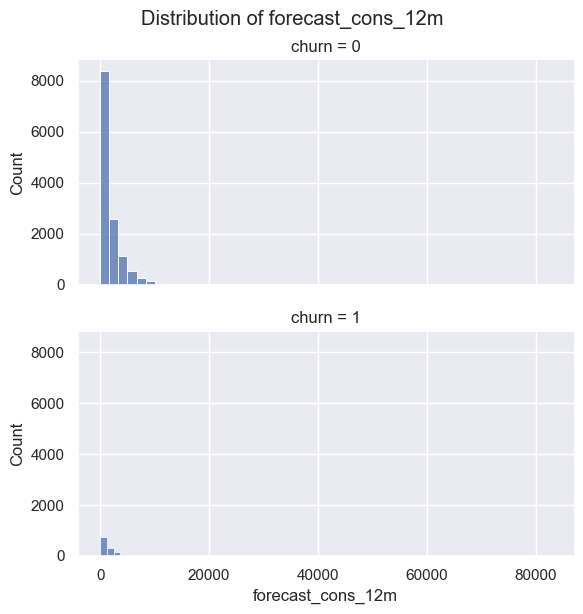

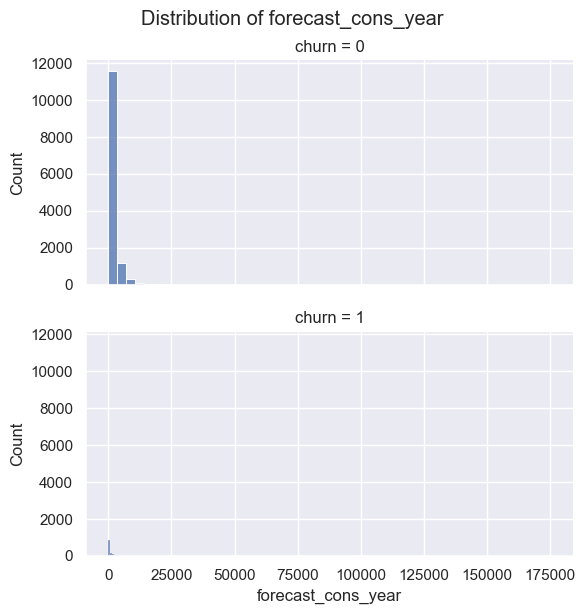

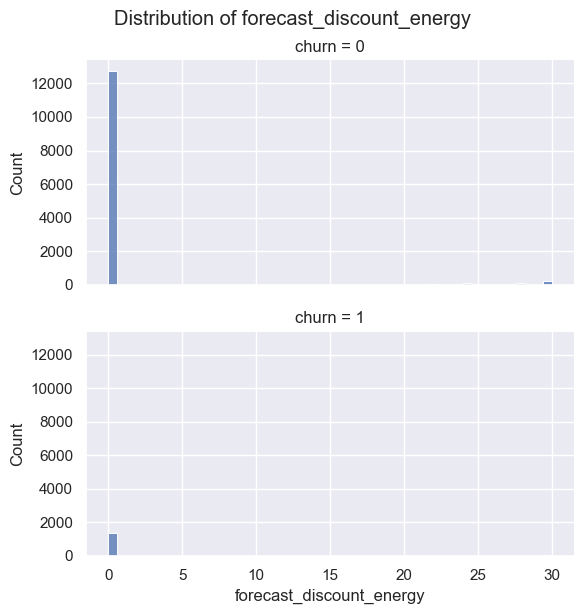

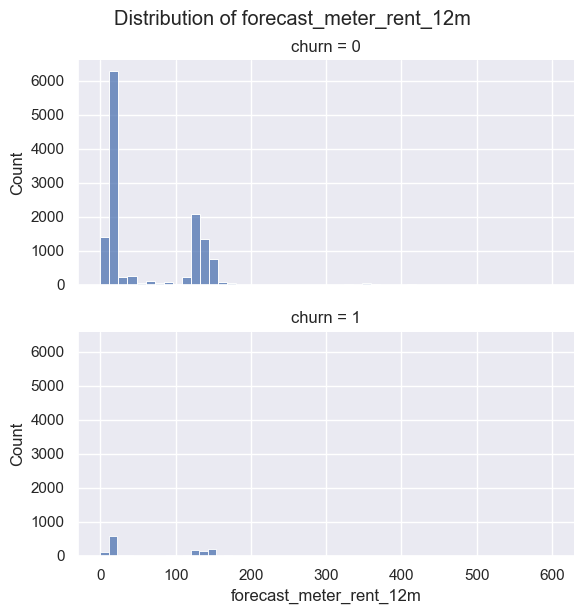

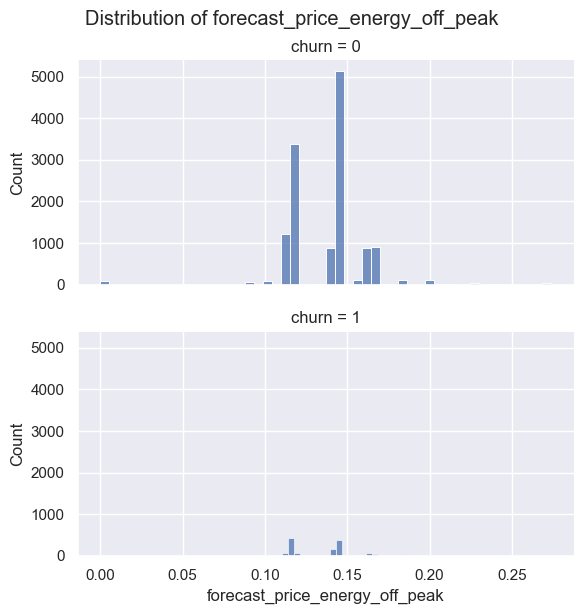

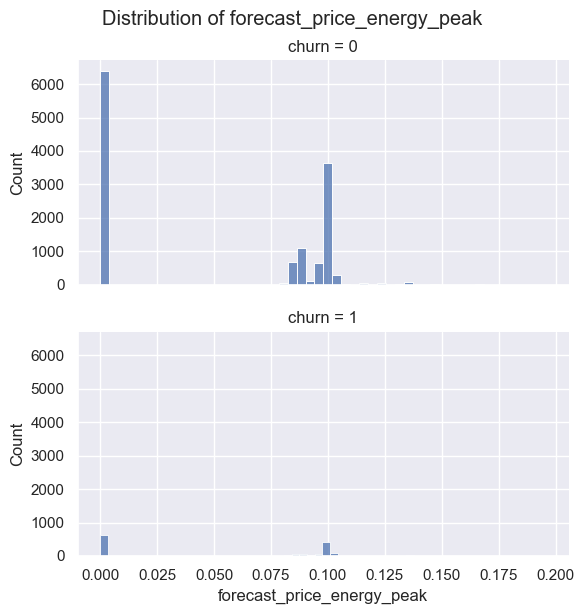

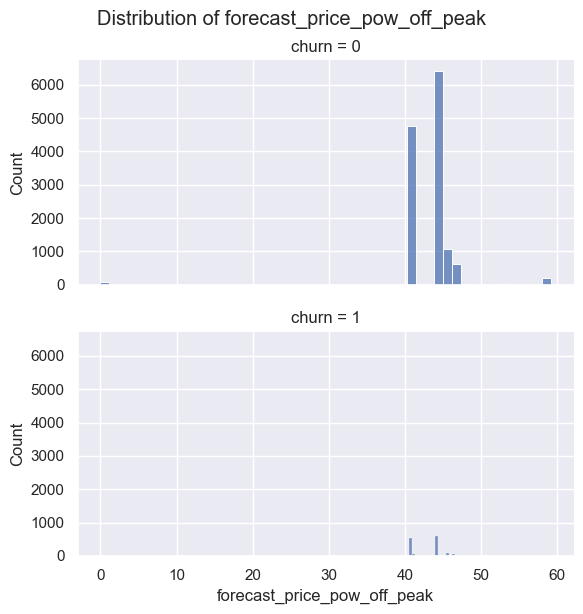

In [33]:
for col in ['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']:
    g = sns.FacetGrid(client_df, row='churn', height=3, aspect=2)
    g.map(sns.histplot, col, bins=50)
    plt.suptitle(f'Distribution of {col}', y=1.02)

-----
## Define price sensitivity and check its correlation with churn

Since we have price data for 2015 and each client may have multiple prices, we need to define a price sensitivity metric by averaging the prices for each client.

In [28]:
price_year = price_df.groupby(['id']).mean().reset_index()
# rename columns
price_year.columns = ['id', 'year_price_off_peak_var', 'year_price_peak_var', 'year_price_mid_peak_var', 'year_price_off_peak_fix', 'year_price_peak_fix', 'year_price_mid_peak_fix']
client_price = pd.merge(client_df[['id', 'churn']], price_year, on='id')

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_3289/2403632471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_year = price_df.groupby(['id']).mean().reset_index()


In [29]:
price_year

,id,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_3289/3554919461.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = client_price.corr()


<AxesSubplot: >

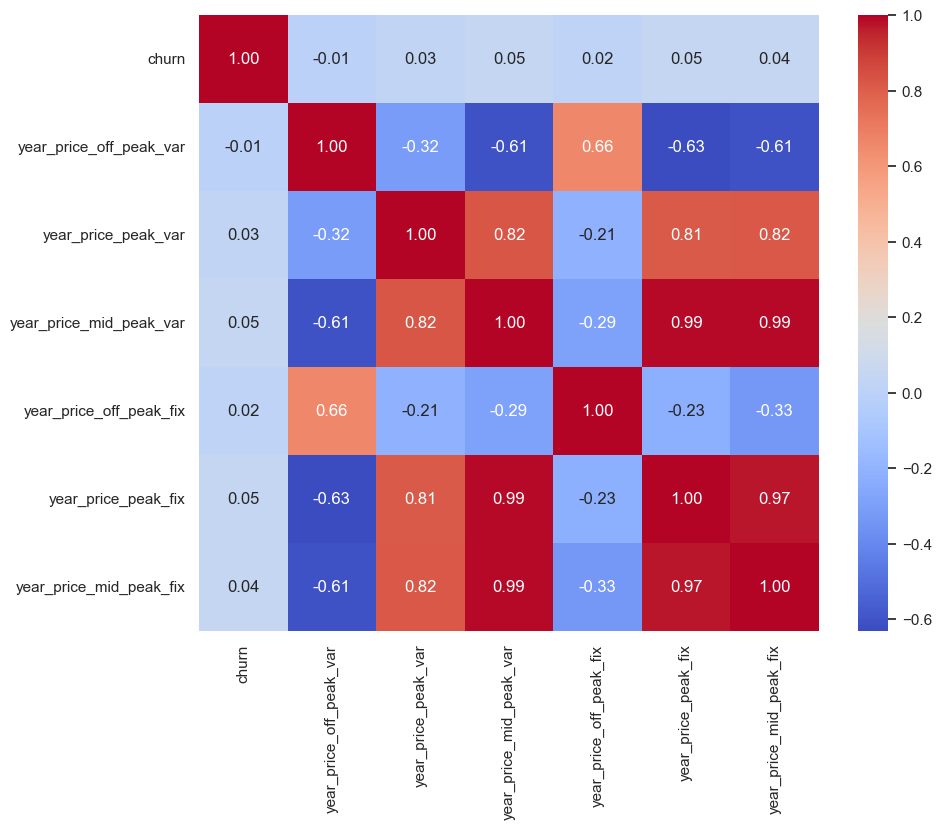

In [30]:
# plot correlation matrix
plt.figure(figsize=(10, 8))
corr = client_price.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

With the correlation matrix, we can see that the price sensitivity is weakly correlated with churn.

----
## Save cleaned data

In [31]:
merged_data = pd.merge(client_df.drop(columns=['churn']), client_price, on='id')
merged_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,year_price_off_peak_var,year_price_peak_var,year_price_mid_peak_var,year_price_off_peak_fix,year_price_peak_fix,year_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263


In [32]:
merged_data.to_csv('clean_data_after_eda.csv', index=False)

-----
# EDA summary

- 14606 customers in the client dataset, and all of them have price data in 2015
- about 9% of customers churned by March 2016
- the consumption data is skewed with a long tail, so as the forecasted consumption
- the price sensitivity is very weakly correlated with churn
- feature engineering is needed to create more features for modeling
